#Pipeline for running inference and classifying squat reps

In [1]:
import sys

sys.path.append('../data')
sys.path.append('..')
sys.path.append('../inference')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ai_trainer import Personal_Trainer
import squat_separation as ss
import pickle
import os
import random as rnd
from collections import defaultdict
import testing_utils as tu

%matplotlib inline

#Step 1: Instantiate our personal trainer and load preprocessed data

In [2]:
exercise = 'squat'
pt = Personal_Trainer({'squat':'NeckY'})
pt.load_reps(exercise,os.path.join('../data/data_sets','multipleClass4.p'))

#Step 2: Extract features 

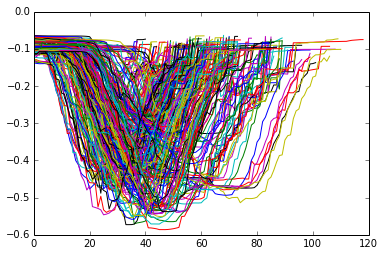

In [3]:
#=====[ Visualize normalized squats ]=====
plt.clf()
for squat in pt.get_reps(exercise):
    plt.plot(-squat['NeckY'])

#Step 3: Classification

##Classification Experimentation with varying sizes of states

In [4]:
from sklearn import ensemble
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn import naive_bayes

In [5]:
X0, Y0, file_names = pt.extract_advanced_features(multiples=[0.5])

In [6]:
X00 = np.concatenate([X0[x] for x in X0],axis=1)

In [15]:
X1, Y1, file_names = pt.extract_advanced_features(multiples=[0.25, 0.5, 0.75])

In [8]:
X10 = np.concatenate([X1[x] for x in X1],axis=1)

In [10]:
X15, Y15, file_names = pt.extract_advanced_features(multiples=[0.2, 0.4, 0.6, 0.8])

math domain error


In [11]:
X150 = np.concatenate([X15[x] for x in X15],axis=1)

math domain error


In [7]:
X2, Y2, file_names = pt.extract_advanced_features(multiples=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

math domain error


In [11]:
X20 = np.concatenate([X2[x] for x in X2],axis=1)

math domain error


In [12]:
X3, Y3, file_names = pt.extract_advanced_features(multiples=[0.05, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95])

math domain error


In [13]:
X30 = np.concatenate([X3[x] for x in X3],axis=1)

math domain error


In [12]:
X4, Y4, file_names = pt.extract_advanced_features(multiples=[float(x)/100 for x in range(100)])

math domain error
math domain error
math domain error
math domain error
math domain error


In [13]:
X40 = np.concatenate([X4[x] for x in X4],axis=1)

In [14]:
#=====[ Choose Component to evaluate and proper labels ]=====

for key in Y20:
    y = Y20[key]

    #=====[ Choose X to utilize from above. Accessing the key of an X gives only the feature set specific to the component, key ]=====
    X=X20

    #=====[ Only use this as your y if testing knees over toes ]=====
    y = coalesce_twos(y)

    #=====[ Run inference with a number of desired classifiers for testing ]=====
    print '\n\n', key, '\n######################################\n\n'
    print 'Naive Bayes'
    tu.rnd_prediction(X,y,file_names, naive_bayes.GaussianNB)
    # print 'Logistic Regression with L1'
    # tu.rnd_prediction(X, y, file_names, linear_model.LogisticRegression, penalty='l1')
    # print 'SVM'
    # tu.rnd_prediction(X, y, file_names, svm.SVC, C=100)
    # print 'Random Forest Classifier Optimized'
    # tu.rnd_prediction(X, y, file_names, ensemble.RandomForestClassifier)
    # print 'Random Forest Classifier Optimized'
    # tu.rnd_prediction(X, y, file_names, ensemble.RandomForestClassifier, max_depth=15)
    # print 'Random Forest Classifier'
    # tu.rnd_prediction(X, y, file_names, ensemble.RandomForestClassifier)
    # print 'Gradient Boosting estimators plus learning rate'
    # tu.rnd_prediction(X, y, file_names, GradientBoostingClassifier, n_estimators = 100, learning_rate = 0.3)
    # print 'Decision Tree w/ min_samples_split = 5 and entropy'
    # tu.rnd_prediction(X, y, file_names, tree.DecisionTreeClassifier, min_samples_split= 5, criterion="entropy")



stance_width 
######################################


Naive Bayes
############ TRAINING DATA ############

Accuracy 0.851315
Precision: 0.586875
Recall: 0.984981
F-score: 0.735514


############ TEST DATA ############

Accuracy 0.660141
Precision: 0.384615
Recall: 0.744681
F-score: 0.507246




back_straight 
######################################


Naive Bayes
############ TRAINING DATA ############

Accuracy 0.776414
Precision: 0.350114
Recall: 1.000000
F-score: 0.518644


############ TEST DATA ############

Accuracy 0.507411
Precision: 0.000000
Recall: 0.000000
F-score: 0.000000




back_hip_angle 
######################################


Naive Bayes
############ TRAINING DATA ############

Accuracy 0.788170
Precision: 0.660729
Recall: 0.996164
F-score: 0.794493


############ TEST DATA ############

Accuracy 0.525716
Precision: 0.485507
Recall: 0.728261
F-score: 0.582609




bend_hips_knees 
######################################


Naive Bayes
############ TRAINING DATA #######

##Best performing classifiers squat components

In [14]:
#=====[ Best classifier for bending hips and knees at the same time ]=====

print 'Decision Tree'
tu.rnd_prediction(X3['bend_hips_knees'], Y3['bend_hips_knees'], file_names, tree.DecisionTreeClassifier, max_depth=3, criterion="entropy")

#extract advanced with X3 = [20] and component specific features
#X3, Y3, file_names = pt.extract_advanced_features(multiples=[0.05, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95])

Decision Tree
############ TRAINING DATA ############
0.974284642756 

True Negative: 0.999703 percent, 3366 total
False Negative: 97 total
True Positive: 0.780543 percent, 442 total
False Positive: 1 total
F-score = 0.875635



############ TEST DATA ############
0.948791591774 

True Negative: 0.989899 percent, 198 total
False Negative: 11 total
True Positive: 0.576923 percent, 26 total
False Positive: 2 total
F-score = 0.697674





In [16]:
#=====[ Best classifier for squat stance ]=====

print 'Logistic Regression with L1'
tu.rnd_prediction(X15['stance_width'], Y15['stance_width'], file_names, linear_model.LogisticRegression, penalty='l1')

#extract advanced with X15 = 20 and component specific features
#X15, Y15, file_names = pt.extract_advanced_features(multiples=[0.2, 0.4, 0.6, 0.8])

Logistic Regression with L1
############ TRAINING DATA ############
0.97818217461 

True Negative: 0.995680 percent, 3009 total
False Negative: 70 total
True Positive: 0.912390 percent, 799 total
False Positive: 13 total
F-score = 0.946139



############ TEST DATA ############
0.897045855379 

True Negative: 0.960452 percent, 177 total
False Negative: 13 total
True Positive: 0.723404 percent, 47 total
False Positive: 7 total
F-score = 0.772727





In [10]:
#=====[ Best classifier for squat depth ]=====

print 'Logistic Regression with L1'
tu.rnd_prediction(X0['squat_depth'], Y0['squat_depth'], file_names, linear_model.LogisticRegression, penalty='l1')

#X0['squat_depth']

Logistic Regression with L1
############ TRAINING DATA ############

Accuracy 0.961637
Precision: 0.944079
Recall: 0.959225
F-score: 0.951592


############ TEST DATA ############

Accuracy 0.768515
Precision: 0.718750
Recall: 0.784091
F-score: 0.750000




In [20]:
#=====[ Best classifier for checking if knees over toes ]=====

y = coalesce_twos(Y30['knees_over_toes'])
print 'Decision Tree w/ min_samples_split = 5 and entropy'
tu.rnd_prediction(X30, y, file_names, tree.DecisionTreeClassifier, max_depth=3, criterion="entropy")
#X3 with all features combined

Decision Tree w/ min_samples_split = 5 and entropy
############ TRAINING DATA ############
0.959245147881 

True Negative: 0.901235 percent, 1377 total
False Negative: 19 total
True Positive: 0.992184 percent, 2431 total
False Positive: 136 total
F-score = 0.968869



############ TEST DATA ############
0.828028826274 

True Negative: 0.641975 percent, 81 total
False Negative: 8 total
True Positive: 0.944056 percent, 143 total
False Positive: 29 total
F-score = 0.879479





In [21]:
#=====[ Best classifier for checking the back-hip angle ]=====

print "Logistic Regression"
tu.rnd_prediction(X00, Y00['back_hip_angle'], file_names, linear_model.LogisticRegression)
#used all features from X00

Logistic Regression
############ TRAINING DATA ############
0.961718784266 

True Negative: 0.985740 percent, 2244 total
False Negative: 114 total
True Positive: 0.927110 percent, 1564 total
False Positive: 32 total
F-score = 0.952068



############ TEST DATA ############
0.731309122976 

True Negative: 0.803030 percent, 132 total
False Negative: 23 total
True Positive: 0.663043 percent, 92 total
False Positive: 26 total
F-score = 0.713450





#Step 4: Plot Accuracy and F-Score vs. Number of States

In [50]:
def coalesce_twos(y):
    y_true = []
    for label in y:
        if label == 2:
            y_true.append(1)
        else:
            y_true.append(label)
    
    return y_true

f_score = []
f_score_t = []
accuracy = []
accuracy_t = []
num_iters = 20
Features = [X00, X10, X150, X20, X30, X40]
y = coalesce_twos(Y00['knees_over_toes'])

for _ in range(0,num_iters):
    f, ft, a, at = tu.rnd_prediction_increase_training(X3['bend_hips_knees'], Y3['bend_hips_knees'], file_names, tree.DecisionTreeClassifier, max_depth=3, criterion="entropy")
    f_score.append(f)
    f_score_t.append(ft)
    accuracy.append(a)
    accuracy_t.append(at)

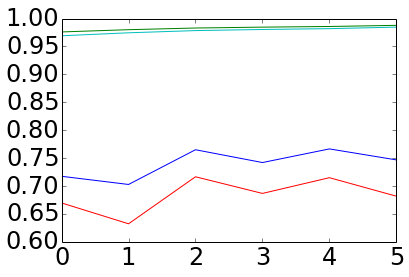

In [51]:
#=====[ Average each of num_iter runs ]=====
f = [np.average(l) for l in zip(*list(f_score))]
ft = [np.average(l) for l in zip(*list(f_score_t))]
a = [np.average(l) for l in zip(*list(accuracy))]
at = [np.average(l) for l in zip(*list(accuracy_t))]

plt.plot(f)
plt.plot(ft)
plt.plot(a)
plt.plot(at)

In [303]:
#=====[ Only use this if you wish to add to existing f1 and average scores ]=====

# avgs = pickle.load(open('Average F1-Scorea and Accuracy Squat.png','rb'))
# avgsf = avgs[0]
# avgsft = avgs[1]
# avgsa = avgs[2]
# avgsat = avgs[3]

# avgsf.append([np.average(l) for l in zip(*list(f_score))])
# avgsft.append([np.average(l) for l in zip(*list(f_score_t))])
# avgsa.append([np.average(l) for l in zip(*list(accuracy))])
# avgsat.append([np.average(l) for l in zip(*list(accuracy_t))])

ValueError: x and y must have same first dimension

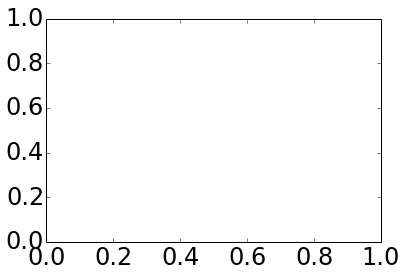

In [57]:
num_training_examples = [x*10 for x in range(1,20)]

#=====[ Plot test and training f_scores and accuracies ]====
plt.plot(num_training_examples, at, color='r', linestyle='--', label='Training Accuracy')
plt.plot(num_training_examples, a, color='r', label='Test Accuracy')
plt.plot(num_training_examples, ft, color='b', linestyle='--', label='Training F1')
plt.plot(num_training_examples, f, color='b', label='Test F1')

#=====[ Add appropriate plot decorations - preparing for saving ]=====
plt.legend(loc='lower right', prop={'size':16})
plt.title('Knees Over Toes \nAverage F1-Score and Accuracy (20 trials)')
plt.xlabel('# Training Examples')
plt.ylabel('F1/Accuracy')
figure = plt.gcf() # get current figure
figure.set_size_inches(12, 8)
plt.rcParams.update({'font.size': 24})
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.axis([0, 200, 0, 1.0])
# figure.savefig("knees_over_toes_resolution.png", dpi = 200)

In [241]:
#=====[ Use this line if you rehydrated the average F-1 scores and accuracies and wish to update it ]====
# pickle.dump([avgsf, avgsft, avgsa, avgsat],open('Average F1-Scorea and Accuracy Squat.png','wb'))